(1, 15000)


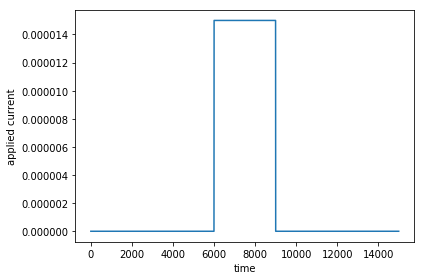

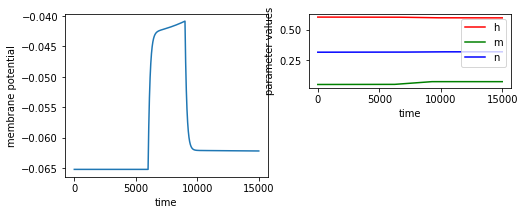

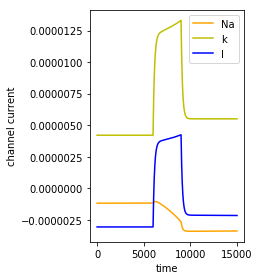

(3, 10000)
n_rp  20
(3, 1)
n_rp  20
(2, 1)
6


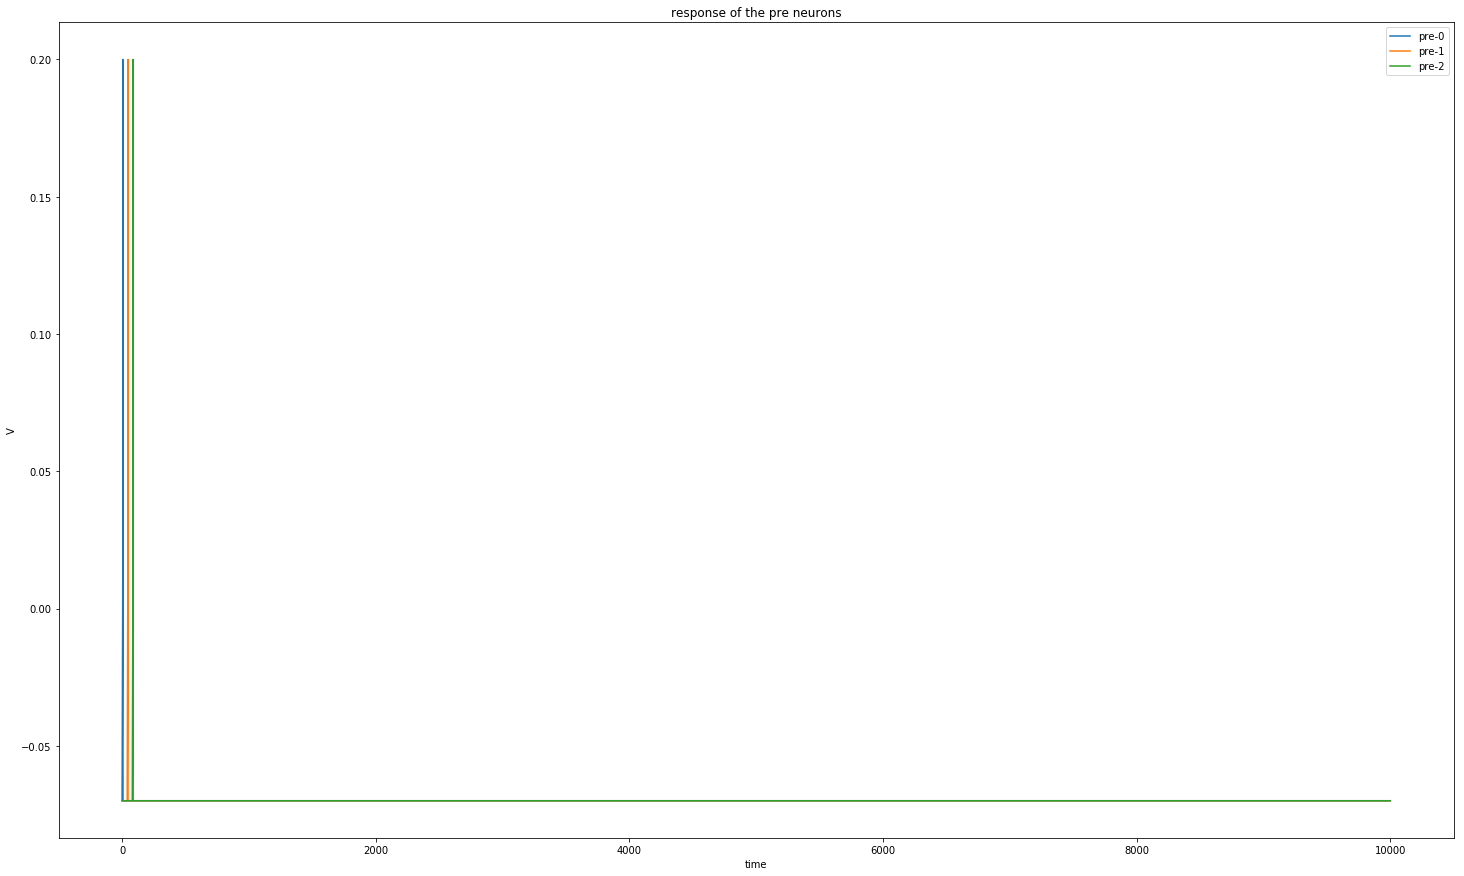

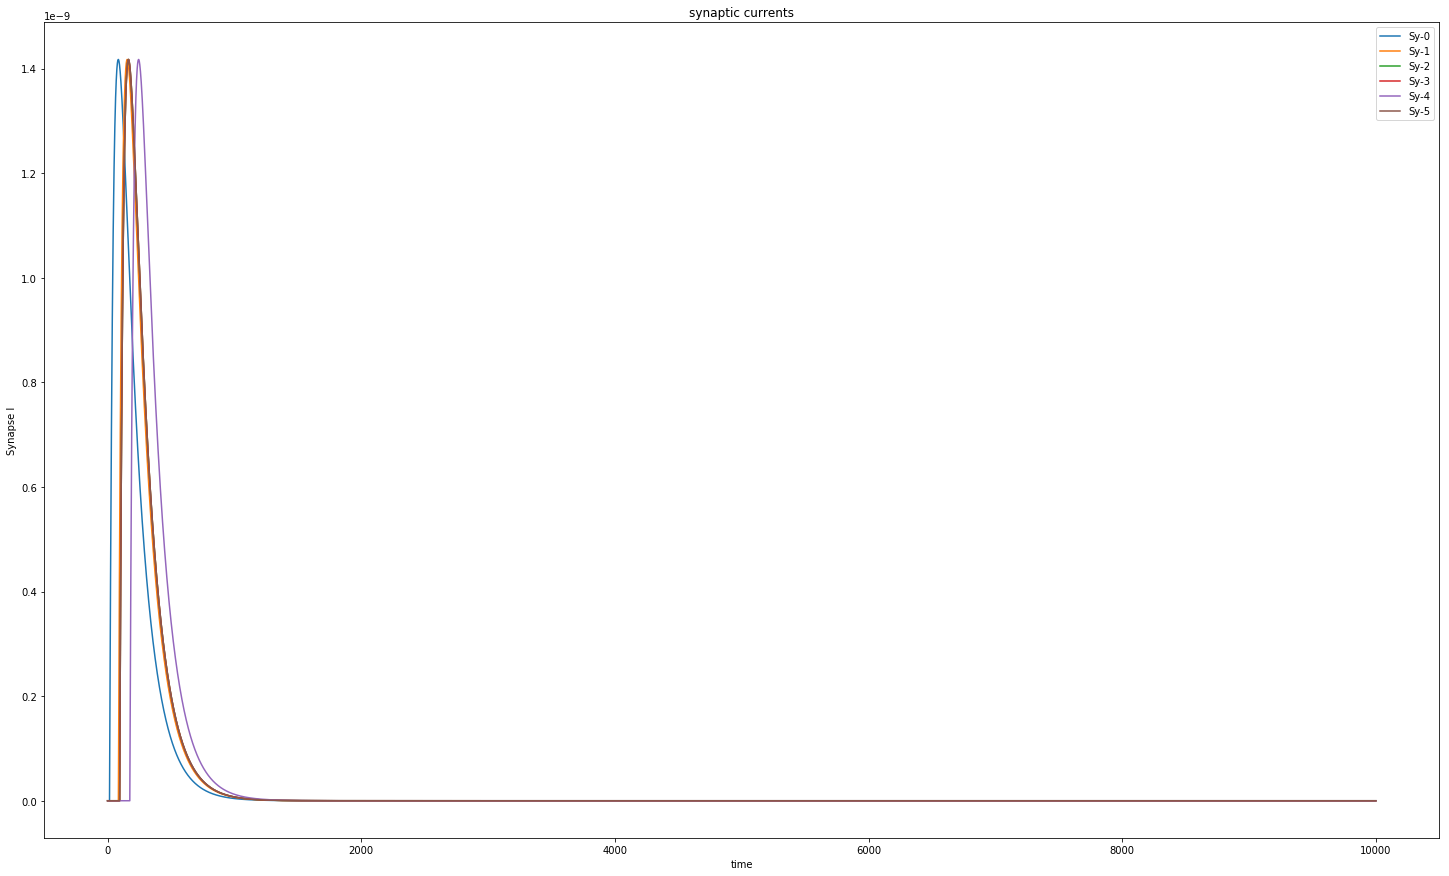

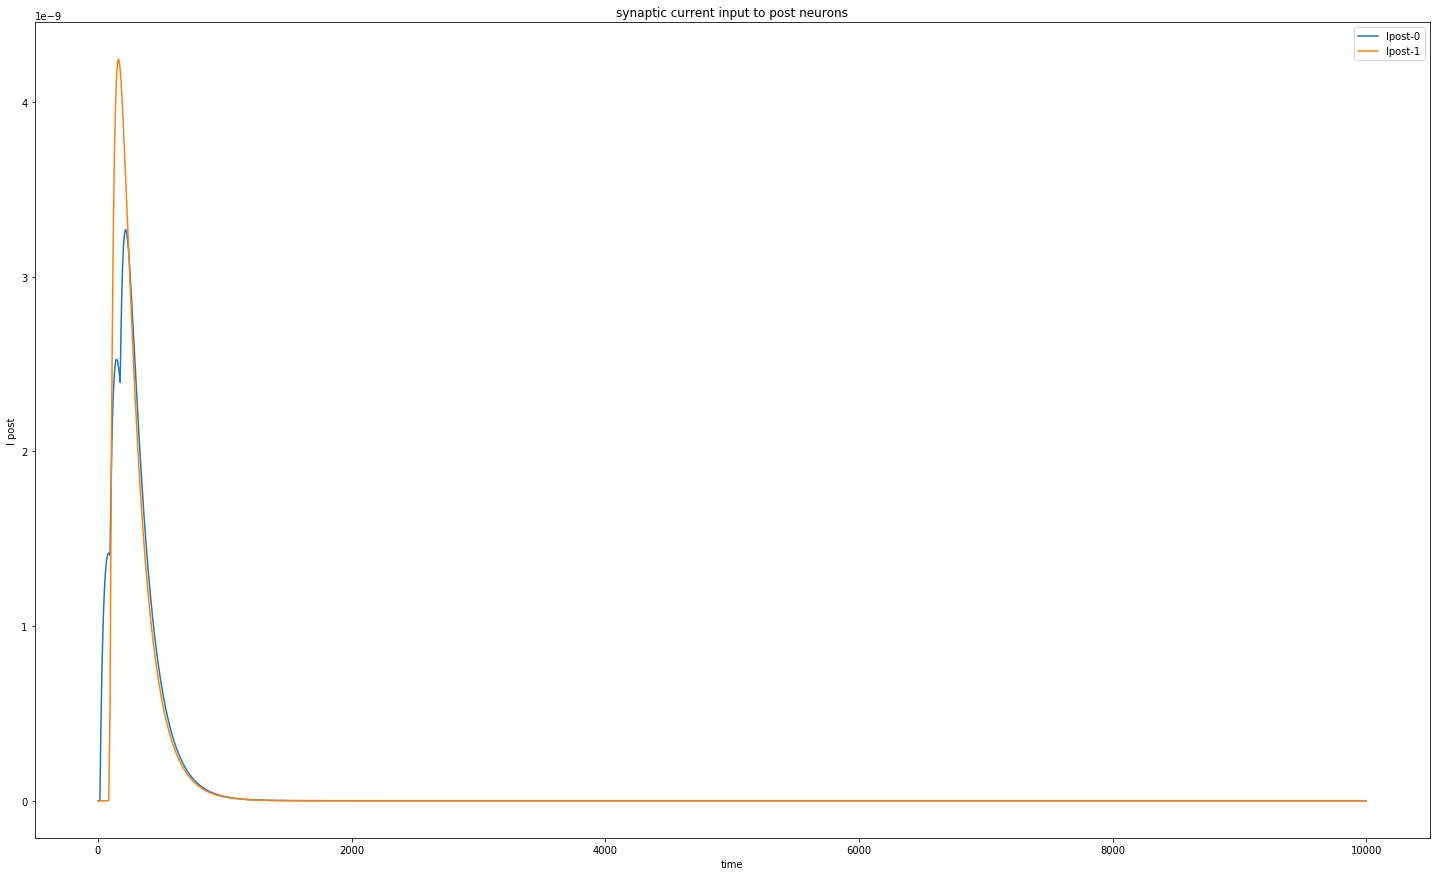

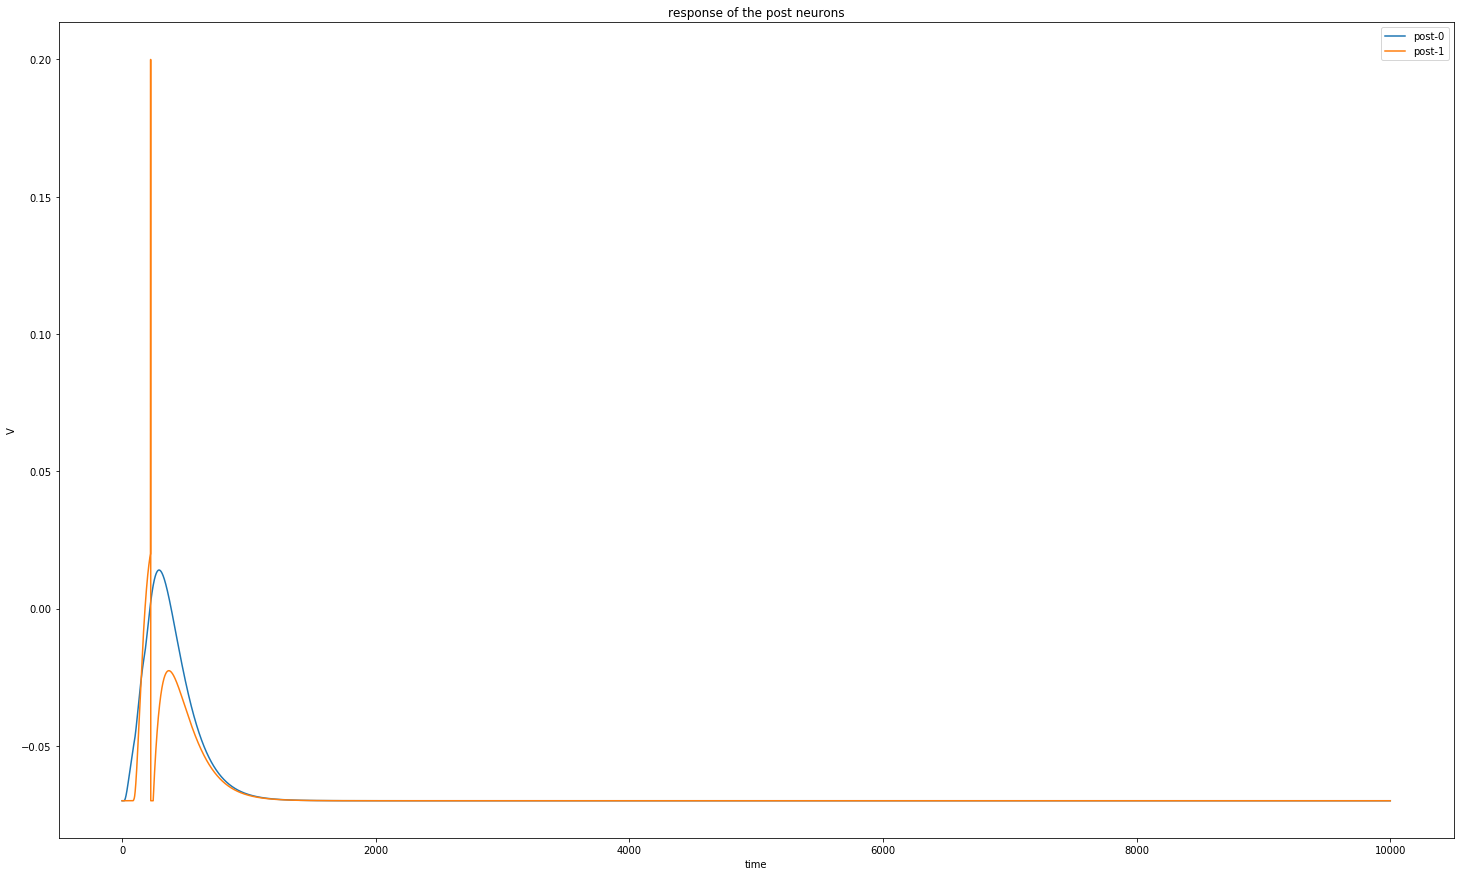

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# import neurons.HH as HH
import Neurapse.Neurons as HH
import Neurapse.utils.CURRENTS as Cur
from Neurapse.Networks import NNetwork_Const

C = 1e-6
E_Na = 50e-3
E_k = -77e-3
E_l = -55e-3
g_Na = 120e-3
g_k = 36e-3
g_l = 0.3e-3
I0 = 15e-6
T = 30e-3
delta_t = 1e-5
n_t = int(5*T//delta_t)+1 #otherwise one-timestep is gone

Sq1 = Cur.SQUARE_PULSE(t_start=6000, t_end=9000, T=n_t)
I = Sq1.generate()
I = I0*I
print(I.shape)
plt.plot(I[0,:])
plt.xlabel('time')
plt.ylabel('applied current')
plt.tight_layout()
plt.show()


N = HH.HH(C, E_Na, E_k, E_l, g_Na, g_k, g_l)
print(N)

V0 = -0.06515672*np.ones((1,1))
h0 = 0.60159082*np.ones((1,1))
m0 = 0.05196212*np.ones((1,1))
n0 = 0.31527801*np.ones((1,1))

V, h, m, n = N.compute(V0, h0, m0, n0, I, delta_t)
i_Na = g_Na*(m**3)*h*(V-E_Na)
i_k = g_k*(n**4)*(V-E_k)
i_l = g_l*(V-E_l)

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(V[0,1:])
plt.xlabel('time')
plt.ylabel('membrane potential')

plt.subplot(2,2,2)
plt.plot(list(range(n_t)), h[0,1:], 'r', label='h')
plt.plot(list(range(n_t)), m[0,1:], 'g', label='m')
plt.plot(list(range(n_t)), n[0,1:], 'b', label='n')
plt.xlabel('time')
plt.ylabel('parameter values')
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.plot(i_Na[0,:], 'orange', label='Na')
plt.plot(i_k[0,:], 'y', label='k')
plt.plot(i_l[0,:], 'b', label='l')
plt.legend()
plt.xlabel('time')
plt.ylabel('channel current')
plt.tight_layout()
plt.show()

Fanout = [
    [0,1],
    [0,1],
    [0,1]
]
W = [
     [3000,3000],
     [3000,3000],
     [3000,3000]
]
Tau = [
     [1e-3,8e-3],
     [5e-3,5e-3],
     [9e-3,1e-3]
]  

A = NNetwork_Const(Fanout, W, Tau, 3, 2)
print(A)

I_pre = np.array([
     50e-9*Cur.SQUARE_PULSE(0, 10, 10000).generate(),
     50e-9*Cur.SQUARE_PULSE(40, 50, 10000).generate(),
     50e-9*Cur.SQUARE_PULSE(80, 90, 10000).generate(),
]).reshape(3,-1)

print(I_pre.shape)
A.compute(I_pre, 1e-4)
A.display(1)



Fanout:  [[1, 1, 9], [7, 2, 5], [7, 4, 0], [8, 4, 8], [1, 8, 6], [2, 9, 3], [3, 3, 4], [5, 1, 5], [1, 4, 0], [5, 2, 2]]
W:  [[1200.0, 1200.0, 1200.0], [1200.0, 1200.0, 1200.0], [1200.0, 1200.0, 1200.0], [1200.0, 1200.0, 1200.0], [1200.0, 1200.0, 1200.0], [1200.0, 1200.0, 1200.0], [-3000, -3000, -3000], [-3000, -3000, -3000], [-3000, -3000, -3000], [-3000, -3000, -3000]]
Tau:  [[0.011649167679476612, 0.01617449325436945, 0.008187433285603923], [0.002103653298367151, 0.01592272596573682, 0.005299789980859104], [0.011061365246366254, 0.015095358942623607, 0.012510619047205327], [0.017971243174397595, 0.002164891628033098, 0.01873184184312277], [0.014674832204016136, 0.005556292962450999, 0.016409568379797058], [0.018988642106624713, 0.008861377691465278, 0.017354416150180203], [0.001, 0.001, 0.001], [0.001, 0.001, 0.001], [0.001, 0.001, 0.001], [0.001, 0.001, 0.001]]
0.015
(1, 20000)
(1, 20000)
(1, 20000)
(1, 20000)
(1, 20000)
0 step done
1000 step done
2000 step done
3000 step done
4000 

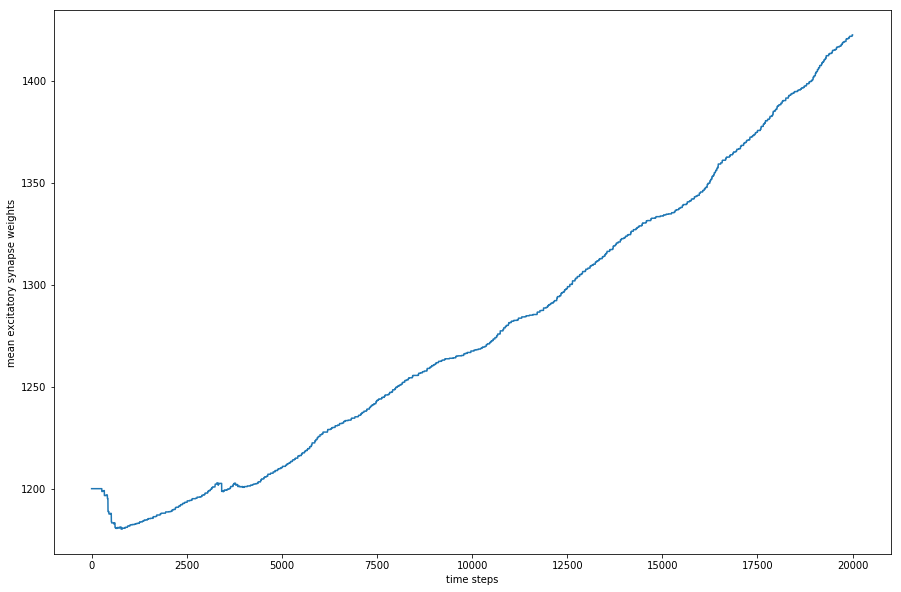

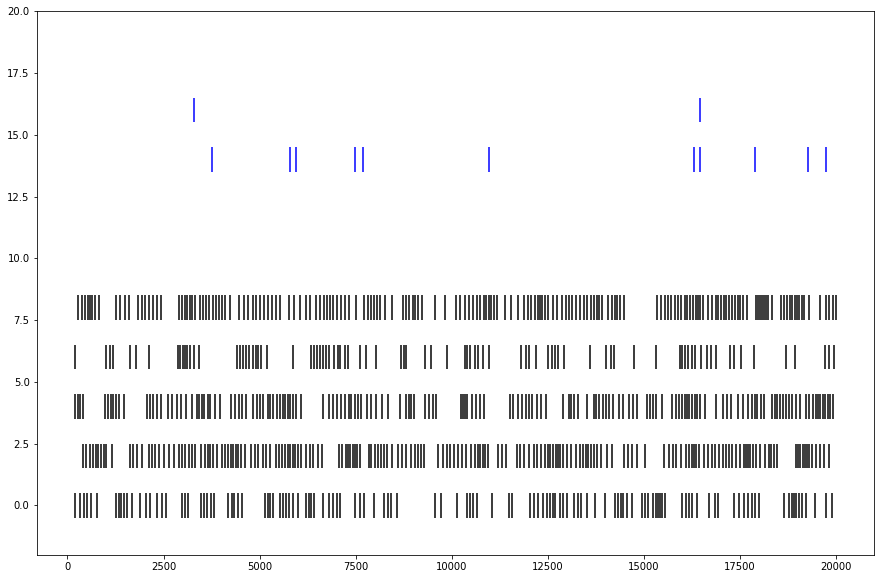

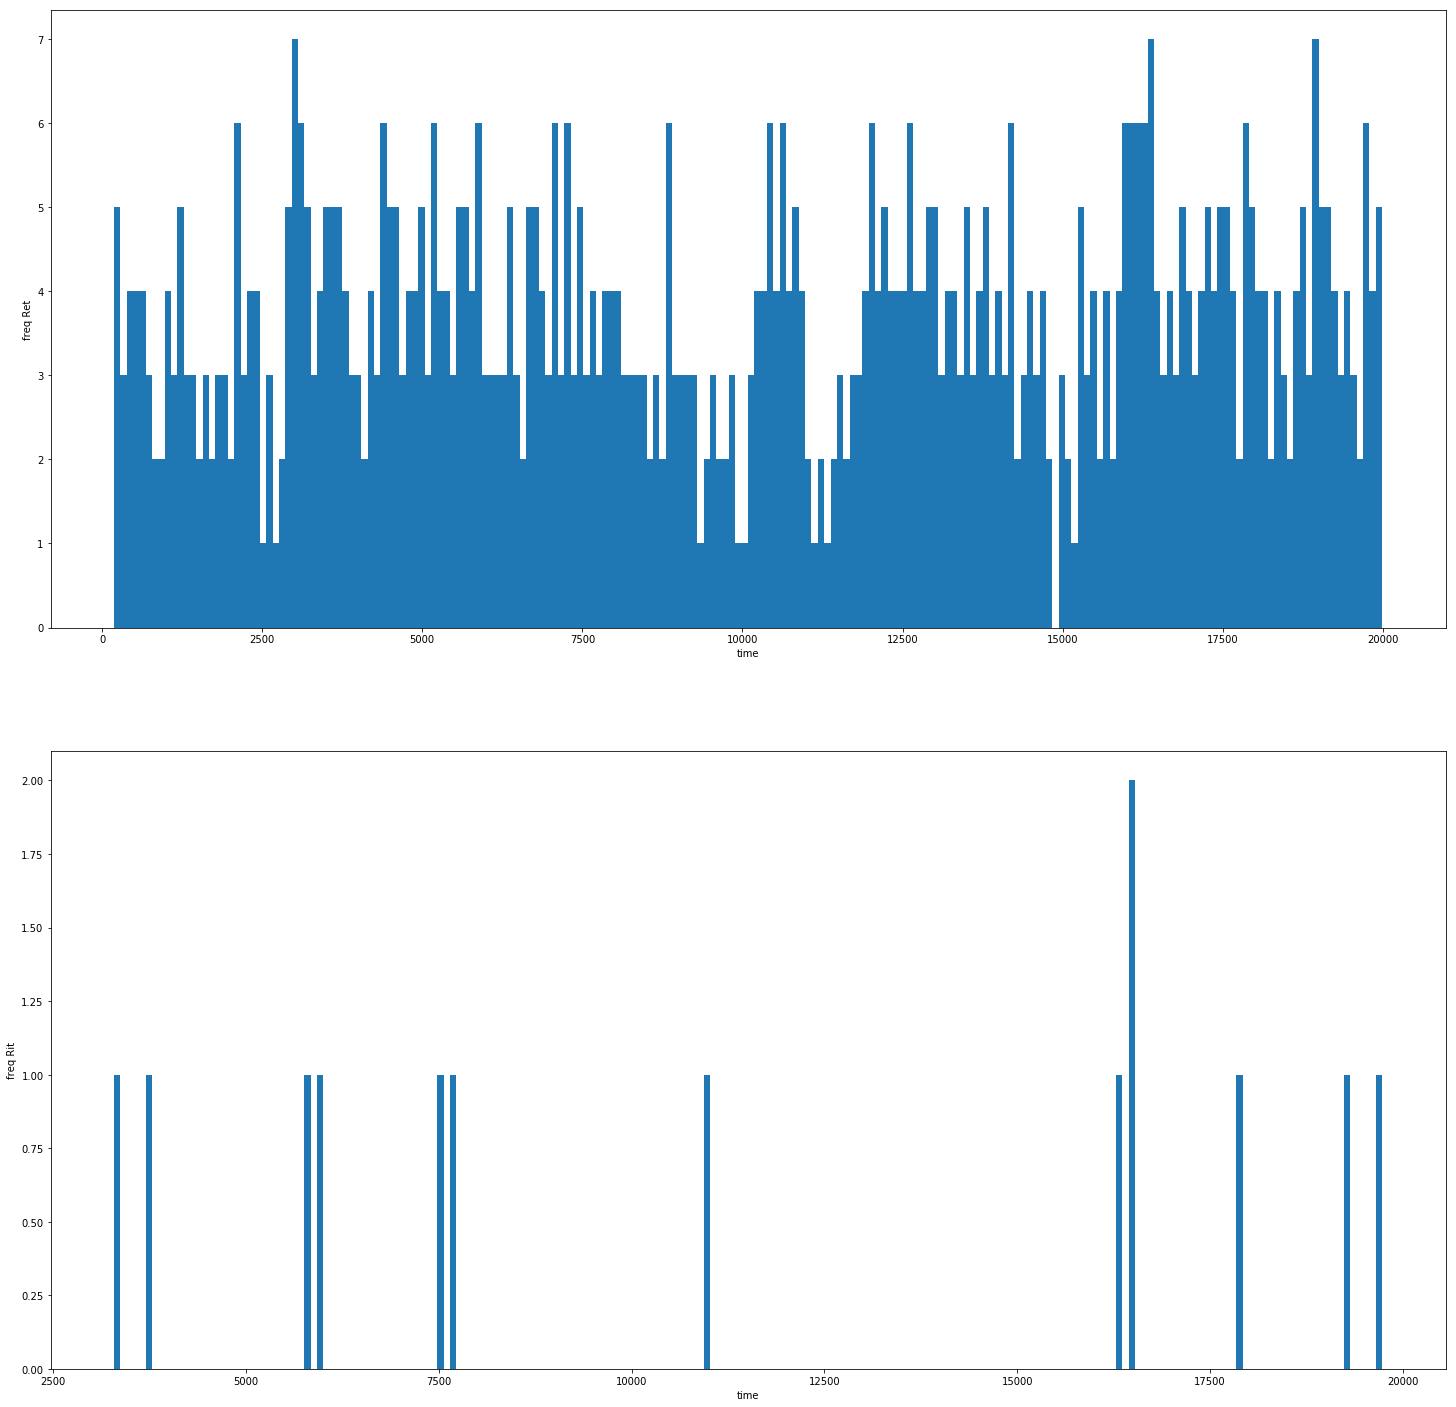

In [26]:
import numpy as np
import matplotlib.pyplot as plt

import Neurapse
from Neurapse.Synapses import *
from Neurapse.utils.SpikeTrains import *
from Neurapse.Networks import *
from Neurapse.utils.CURRENTS import *




#usage : DRN_Const problem 2 and 3
def DRN_const_driver(N, exci_frac, connect_frac):
    N_exci = int(N*exci_frac)
    N_inhi = N - N_exci

    # Constructing the network
    exci_neuron_id = range(N_exci)
    inhi_neuron_id = range(N_exci, N)

    Fanout = []
    W = []
    Tau = []
    w0 = 3000
    gamma = 0.77 #for problem 3
    gamma = 1# for problem 2
    for i in exci_neuron_id:
        a = []
        for z in range(N):
            if z!=i:
                a.append(z)
        tempFL = []
        tempWL = []
        tempTL = []
        for j in range(int(connect_frac*N)):
            t = np.random.choice(a)
            tempFL.append(t)
            tempWL.append(gamma*w0)
            tempTL.append(np.random.uniform(1e-3, 20e-3))
        W.append(tempWL)
        Fanout.append(tempFL)
        Tau.append(tempTL)

    for i in inhi_neuron_id:
        tempFL = []
        tempWL = []
        tempTL = []
        for j in range(int(connect_frac*N)):
            t = np.random.choice(exci_neuron_id)
            tempFL.append(t)
            tempWL.append(-w0)
            tempTL.append(1e-3)
        W.append(tempWL)
        Fanout.append(tempFL)
        Tau.append(tempTL)
    print('Fanout: ', Fanout)
    print('W: ', W)
    print('Tau: ', Tau)

    A = DRN_Const(Fanout, W, Tau_d=Tau, Tau=15e-3, I0=1e-12, N=N, T=20000, delta_t=1e-4)
    # Creating poisson spike trains as inputs for first 25 neurons
    # Note: Originally this was meant for poisson potential spikes, 
    # here using as current
    T = 20000
    Tau = 15e-3
    delta_t = 1e-4
    n_out = 5
    I0 = 1e-12
    ST = POISSON_SPIKE_TRAIN(T=int(T*delta_t), delta_t=delta_t, lamb=100, n_out=n_out)
    V_poi_spikes = ST.V_train[:,:-1]
    # print(V_poi_spikes.shape)
    
    reference_alpha = np.zeros(T)
    for t in range(3*int(Tau//delta_t)):
        reference_alpha[t] = np.exp(-t*delta_t/Tau) - np.exp(-4*t*delta_t/Tau)
    # plt.plot(reference_alpha)
    # plt.show()
    
    I_poi = np.zeros(shape=(n_out, T))
    for idx in range(n_out):
        V_sp = V_poi_spikes[idx,:].reshape(1,-1)
        print(V_sp.shape)
        for t,v in enumerate(V_sp[0,:]):
            if v>0:
                t1 = t
                t2 = min(t+int(3*Tau//delta_t), T)
                I_poi[idx, t1:t2] += w0*I0*reference_alpha[0:t2-t1]
    
    # for idx in range(n_out):
    #     plt.plot(I_poi[idx,:])
    #     plt.show()

    I_app = np.zeros(shape=(N, T))
    I_app[0:n_out, :] = I_poi
    El = -70e-3
    V_thresh = 20e-3
    V0 = El*np.ones(shape=(N,1))
    A.compute(I_app=I_app, V0=V0, delta_t=delta_t)

    V_response = A.V_collector
    I_app_feed = A.I_app_collector #same as I_app
    I_synapse_feed = A.I_synapse_feed
    
    exci_spike_instants = get_spike_instants_from_neuron(
        V_response[exci_neuron_id,:],
        V_thresh
    )

    inhi_spike_instants = get_spike_instants_from_neuron(
        V_response[inhi_neuron_id,:],
        V_thresh
    )

    # print(exci_spike_instants)
    # print(inhi_spike_instants)

    colorCodes = np.array(
        [[0,0,0]]*N_exci
        +
        [[0,0,1]]*N_inhi
    )
    plt.eventplot(exci_spike_instants + inhi_spike_instants, color=colorCodes, lineoffsets=2)
    plt.show()

    # for i in range(N):
    #     plt.plot(I_synapse_feed[i, :])
    #     plt.show()
    
    # Ret and Rit
    Ret = []
    Rit = []
    for l in exci_spike_instants:
        Ret = Ret+list(l)
    for l in inhi_spike_instants:
        Rit = Rit+list(l)
    Ret_sorted = sorted(Ret)
    Rit_sorted = sorted(Rit)
    t0 = 100
    plt.figure(figsize=(25, 25))
    plt.subplot(2,1,1)
    plt.hist(Ret_sorted, bins=int(T/t0))
    plt.xlabel('time')
    plt.ylabel('freq Ret')

    plt.subplot(2,1,2)
    plt.hist(Rit_sorted, bins=int(T/t0))
    plt.xlabel('time')
    plt.ylabel('freq Rit')
    plt.show()
    return Fanout, W, Tau

#usage : DRN_Plastic problem 4 and 5
def DRN_Plastic_driver(N, exci_frac, connect_frac):
    N_exci = int(N*exci_frac)
    N_inhi = N - N_exci

    # Constructing the network
    exci_neuron_id = range(N_exci)
    inhi_neuron_id = range(N_exci, N)

    Fanout = []
    W = []
    Tau = []

    w0 = 3000
    # gamma = 1 #for problem 4
    gamma = 0.4 # for problem 5
    for i in exci_neuron_id:
        a = []
        for z in range(N):
            if z!=i:
                a.append(z)
        tempFL = []
        tempWL = []
        tempTL = []
        for j in range(int(connect_frac*N)):
            t = np.random.choice(a)
            tempFL.append(t)
            tempWL.append(gamma*w0)
            tempTL.append(np.random.uniform(1e-3, 20e-3))
        W.append(tempWL)
        Fanout.append(tempFL)
        Tau.append(tempTL)

    for i in inhi_neuron_id:
        tempFL = []
        tempWL = []
        tempTL = []
        for j in range(int(connect_frac*N)):
            t = np.random.choice(exci_neuron_id)
            tempFL.append(t)
            tempWL.append(-w0)
            tempTL.append(1e-3)
        W.append(tempWL)
        Fanout.append(tempFL)
        Tau.append(tempTL)
    print('Fanout: ', Fanout)
    print('W: ', W)
    print('Tau: ', Tau)

    A = DRN_Plastic(Fanout, W, Tau_d=Tau, Tau=15e-3, Tau_l=20e-3, I0=1e-12, A_up=0.01, A_dn=-0.07, N=N, N_exci=N_exci, T=20000, delta_t=1e-4, gamma=gamma)
    # Creating poisson spike trains as inputs for first 25 neurons
    # Note: Originally this was meant for poisson potential spikes, 
    # here using as current
    T = 20000
    Tau = 15e-3
    delta_t = 1e-4
    n_out = 5
    I0 = 1e-12
    ST = POISSON_SPIKE_TRAIN(T=int(T*delta_t), delta_t=delta_t, lamb=100, n_out=n_out)
    V_poi_spikes = ST.V_train[:,:-1]
    # print(V_poi_spikes.shape)
    
    reference_alpha = np.zeros(T)
    for t in range(3*int(Tau//delta_t)):
        reference_alpha[t] = np.exp(-t*delta_t/Tau) - np.exp(-4*t*delta_t/Tau)
    # plt.plot(reference_alpha)
    # plt.show()
    
    I_poi = np.zeros(shape=(n_out, T))
    for idx in range(n_out):
        V_sp = V_poi_spikes[idx,:].reshape(1,-1)
        print(V_sp.shape)
        for t,v in enumerate(V_sp[0,:]):
            if v>0:
                t1 = t
                t2 = min(t+int(3*Tau//delta_t), T)
                I_poi[idx, t1:t2] += w0*I0*reference_alpha[0:t2-t1]
    
    # for idx in range(n_out):
    #     plt.plot(I_poi[idx,:])
    #     plt.show()

    I_app = np.zeros(shape=(N, T))
    I_app[0:n_out, :] = I_poi
    El = -70e-3
    V_thresh = 20e-3
    V0 = El*np.ones(shape=(N,1))
    A.compute(I_app=I_app, V0=V0, delta_t=delta_t)

    V_response = A.V_collector
    I_app_feed = A.I_app_collector #same as I_app
    I_synapse_feed = A.I_synapse_feed

    avg_weights = A.avg_weights
    plt.plot(avg_weights)
    plt.xlabel('time steps')
    plt.ylabel('mean excitatory synapse weights')
    plt.show()
    
    exci_spike_instants = get_spike_instants_from_neuron(
        V_response[exci_neuron_id,:],
        V_thresh
    )

    inhi_spike_instants = get_spike_instants_from_neuron(
        V_response[inhi_neuron_id,:],
        V_thresh
    )

    colorCodes = np.array(
        [[0,0,0]]*N_exci
        +
        [[0,0,1]]*N_inhi
    )
    plt.eventplot(exci_spike_instants + inhi_spike_instants, color=colorCodes, lineoffsets=2)
    plt.show()

    # Ret and Rit
    Ret = []
    Rit = []
    for l in exci_spike_instants:
        Ret = Ret+list(l)
    for l in inhi_spike_instants:
        Rit = Rit+list(l)
    Ret_sorted = sorted(Ret)
    Rit_sorted = sorted(Rit)
    t0 = 100
    plt.figure(figsize=(25, 25))
    plt.subplot(2,1,1)
    plt.hist(Ret_sorted, bins=int(T/t0))
    plt.xlabel('time')
    plt.ylabel('freq Ret')

    plt.subplot(2,1,2)
    plt.hist(Rit_sorted, bins=int(T/t0))
    plt.xlabel('time')
    plt.ylabel('freq Rit')
    plt.show()
    return Fanout, W, Tau

#Fanout, W, Tau = DRN_const_driver(N=10, exci_frac=0.8, connect_frac=0.3)
Fanout, W, Tau = DRN_Plastic_driver(N=10, exci_frac=0.6, connect_frac=0.3)

In [4]:
T = 20000
Tau = 15e-3
delta_t = 1e-4
n_out = 25
I0 = 1e-12
ST = POISSON_SPIKE_TRAIN(T=int(T*delta_t), delta_t=delta_t, lamb=100, n_out=n_out)
V_poi_spikes = ST.V_train[:,:-1]
print(V_poi_spikes.shape)

(25, 20000)


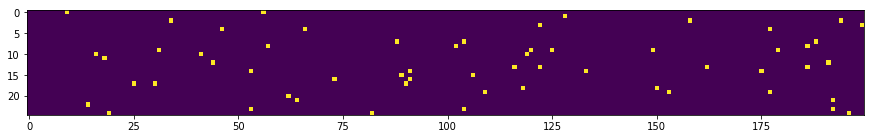

In [5]:
plt.figure(figsize=(15,20))
plt.imshow(ST.V_train[:,:200])

In [48]:
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nx

agac = nx.DiGraph()




In [74]:
for i in range(len(Fanout)):
    if(i<6):
        agac.add_node(i, color ='red')
    else:
        agac.add_node(i, color ='blue')

for i,f in enumerate(Fanout):
    for j, k in enumerate(f):        
        agac.add_edge(i, k, weight = W[i][j])

In [81]:
culori = nx.get_node_attributes(agac,'color') 
culori = [['red'  if nod <6 else "blue"  for nod in agac.nodes()] ]
print(culori)

[['red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue']]


In [86]:
 def agCizdir(agac, title = "Tree structure", short=False):
        plt.rcParams['figure.figsize'] = [15, 10]         
        #labels = dict((n, d['value']) for n, d in self.agac.nodes(data=True))        
        pos = nx.circular_layout(agac)
        labels = nx.get_edge_attributes(agac,'weight')
        val_map= nx.get_node_attributes(agac,'color')        
        values = [val_map.get(node, 0.25) for node in agac.nodes()]
        
        
        culori = [['red'  if nod <6 else "blue"  for nod in agac.nodes()] ]#nx.get_node_attributes(agac,'color')        
        plt.title(title +" node values")
        
        nx.draw(agac,pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500) # node_color = culori)
        labels = nx.get_edge_attributes(agac,'weight')
        nx.draw_networkx_edge_labels(agac,pos,edge_labels=labels)
        
        #nx.draw_networkx(agac, pos=pos, arrows=True, with_labels=True, edge_labels=labels)
        plt.show()
        
        
        


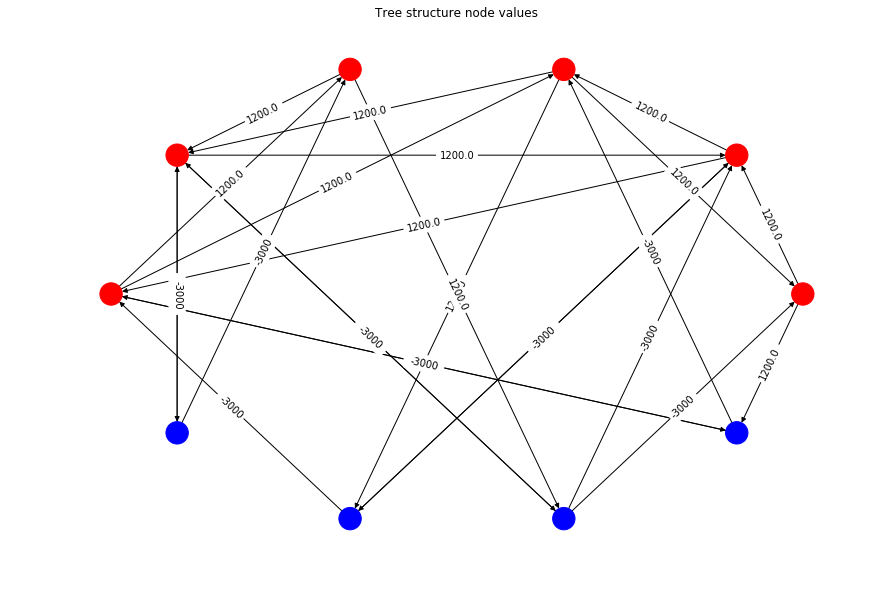

In [87]:
agCizdir(agac)